In [1]:
from pathlib import Path
from dataclasses import dataclass
import sys

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

%matplotlib inline
%load_ext autoreload
%autoreload 2


@dataclass
class Config:
    REPO_ROOT: Path = Path("../../")
    data_dir: Path = REPO_ROOT / "data"
    seed: int = 42
    test_size: float = 0.2


config = Config()
sys.path.append(str(config.REPO_ROOT))

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 9.5.2 Examples and Interpretation

In [2]:
from python.src.preprocess import (
    preprocess_rfcc,
)

df_rfcc = pd.read_csv(config.data_dir / "risk_factors_cervical_cancer.csv")
df_rfcc_preprocessed = preprocess_rfcc(df=df_rfcc)
assert df_rfcc.shape[0] == df_rfcc_preprocessed.shape[0]

X = df_rfcc_preprocessed.drop("Biopsy", axis=1)
y = df_rfcc_preprocessed["Biopsy"].map({"Healthy": 0, "Cancer": 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=config.test_size, random_state=config.seed
)


rf_model = RandomForestClassifier(random_state=config.seed)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

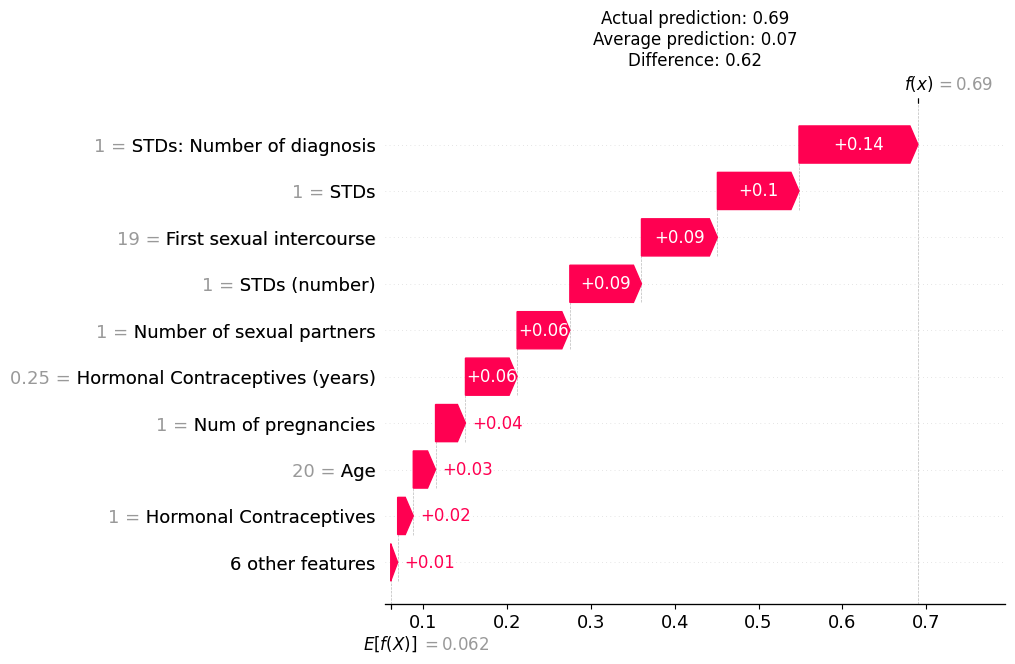

In [3]:
explainer = shap.Explainer(rf_model, X)

instance_index = 325
x_interest = X.iloc[[instance_index]]
shap_values = explainer(x_interest)
shap_values_for_plot = shap_values[0, :, 1]

avg_prediction = rf_model.predict_proba(X)[:, 1].mean()
actual_prediction = rf_model.predict_proba(x_interest)[0, 1]
diff_prediction = actual_prediction - avg_prediction
shap.plots.waterfall(shap_values_for_plot, show=False)
plt.title(
    f"Actual prediction: {actual_prediction:.2f}\nAverage prediction: {avg_prediction:.2f}\nDifference: {diff_prediction:.2f}"
)
plt.ylabel("Feature value contribution")
plt.show()

In [4]:
from python.src.preprocess import (
    preprocess_bike_data,
)

df_bike = pd.read_csv(config.data_dir / "bike-sharing-daily.csv")
df_bike_processed = preprocess_bike_data(df=df_bike)
assert df_bike.shape[0] == df_bike_processed.shape[0]

df_bike_processed["holiday"] = df_bike_processed["holiday"].map(
    {"HOLIDAY": 1, "NO HOLIDAY": 0}
)
df_bike_processed["season"] = df_bike_processed["season"].map(
    {
        "WINTER": 1,
        "SPRING": 2,
        "SUMMER": 3,
        "FALL": 4,
    }
)
df_bike_processed["workingday"] = df_bike_processed["workingday"].map(
    {"WORKING DAY": 1, "NO WORKING DAY": 0}
)
df_bike_processed["mnth"] = df_bike_processed["mnth"].map(
    {
        "JAN": 1,
        "FEB": 2,
        "MAR": 3,
        "APR": 4,
        "MAY": 5,
        "JUN": 6,
        "JUL": 7,
        "AUG": 8,
        "SEP": 9,
        "OCT": 10,
        "NOV": 11,
        "DEC": 12,
    }
)
df_bike_processed["weekday"] = df_bike_processed["weekday"].map(
    {
        "SUN": 1,
        "MON": 2,
        "TUE": 3,
        "WED": 4,
        "THU": 5,
        "FRI": 6,
        "SAT": 7,
    }
)
df_bike_processed["weathersit"] = df_bike_processed["weathersit"].map(
    {"MISTY": 1, "GOOD": 2, "RAIN/SNOW/STORM": 3}
)
X = df_bike_processed.drop(columns="cnt")
y = df_bike_processed["cnt"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=config.test_size, random_state=config.seed
)
rf_model_train = RandomForestRegressor(random_state=config.seed)
rf_model_train.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

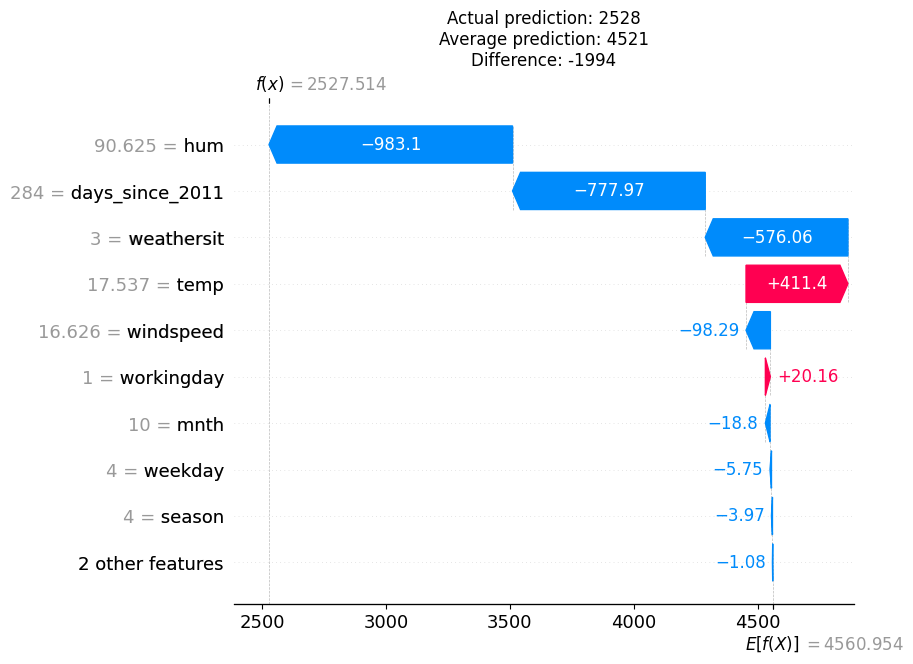

In [5]:
explainer = shap.Explainer(rf_model_train, X)

instance_indices = [294, 284]
x_interest = X.iloc[[instance_indices[1]]]
shap_values = explainer(x_interest)

avg_prediction = rf_model_train.predict(X).mean()
actual_prediction = rf_model_train.predict(x_interest)[0]
diff_prediction = actual_prediction - avg_prediction

shap.plots.waterfall(shap_values[0], show=False)
plt.title(
    f"Actual prediction: {actual_prediction:.0f}\nAverage prediction: {avg_prediction:.0f}\nDifference: {diff_prediction:.0f}"
)
plt.ylabel("Feature value contribution")
plt.show()